Consider only the below columns and prepare a prediction model for predicting Price.
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")].

In [1]:
from google.colab import files
upload=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
list(df)

['Id',
 'Model',
 'Price',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'Fuel_Type',
 'HP',
 'Met_Color',
 'Color',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Tow_Bar']

In [5]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [6]:
df1=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
# Standardization
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
df1["Price"] =pd.DataFrame(MM.fit_transform(df1[["Price"]]))
df1["Price"]

<ipython-input-7-38fdcb53dd81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Price"] =pd.DataFrame(MM.fit_transform(df1[["Price"]]))


0       0.325044
1       0.333925
2       0.341030
3       0.376554
4       0.333925
          ...   
1431    0.111901
1432    0.230728
1433    0.147425
1434    0.103020
1435    0.092362
Name: Price, Length: 1436, dtype: float64

In [8]:
df1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


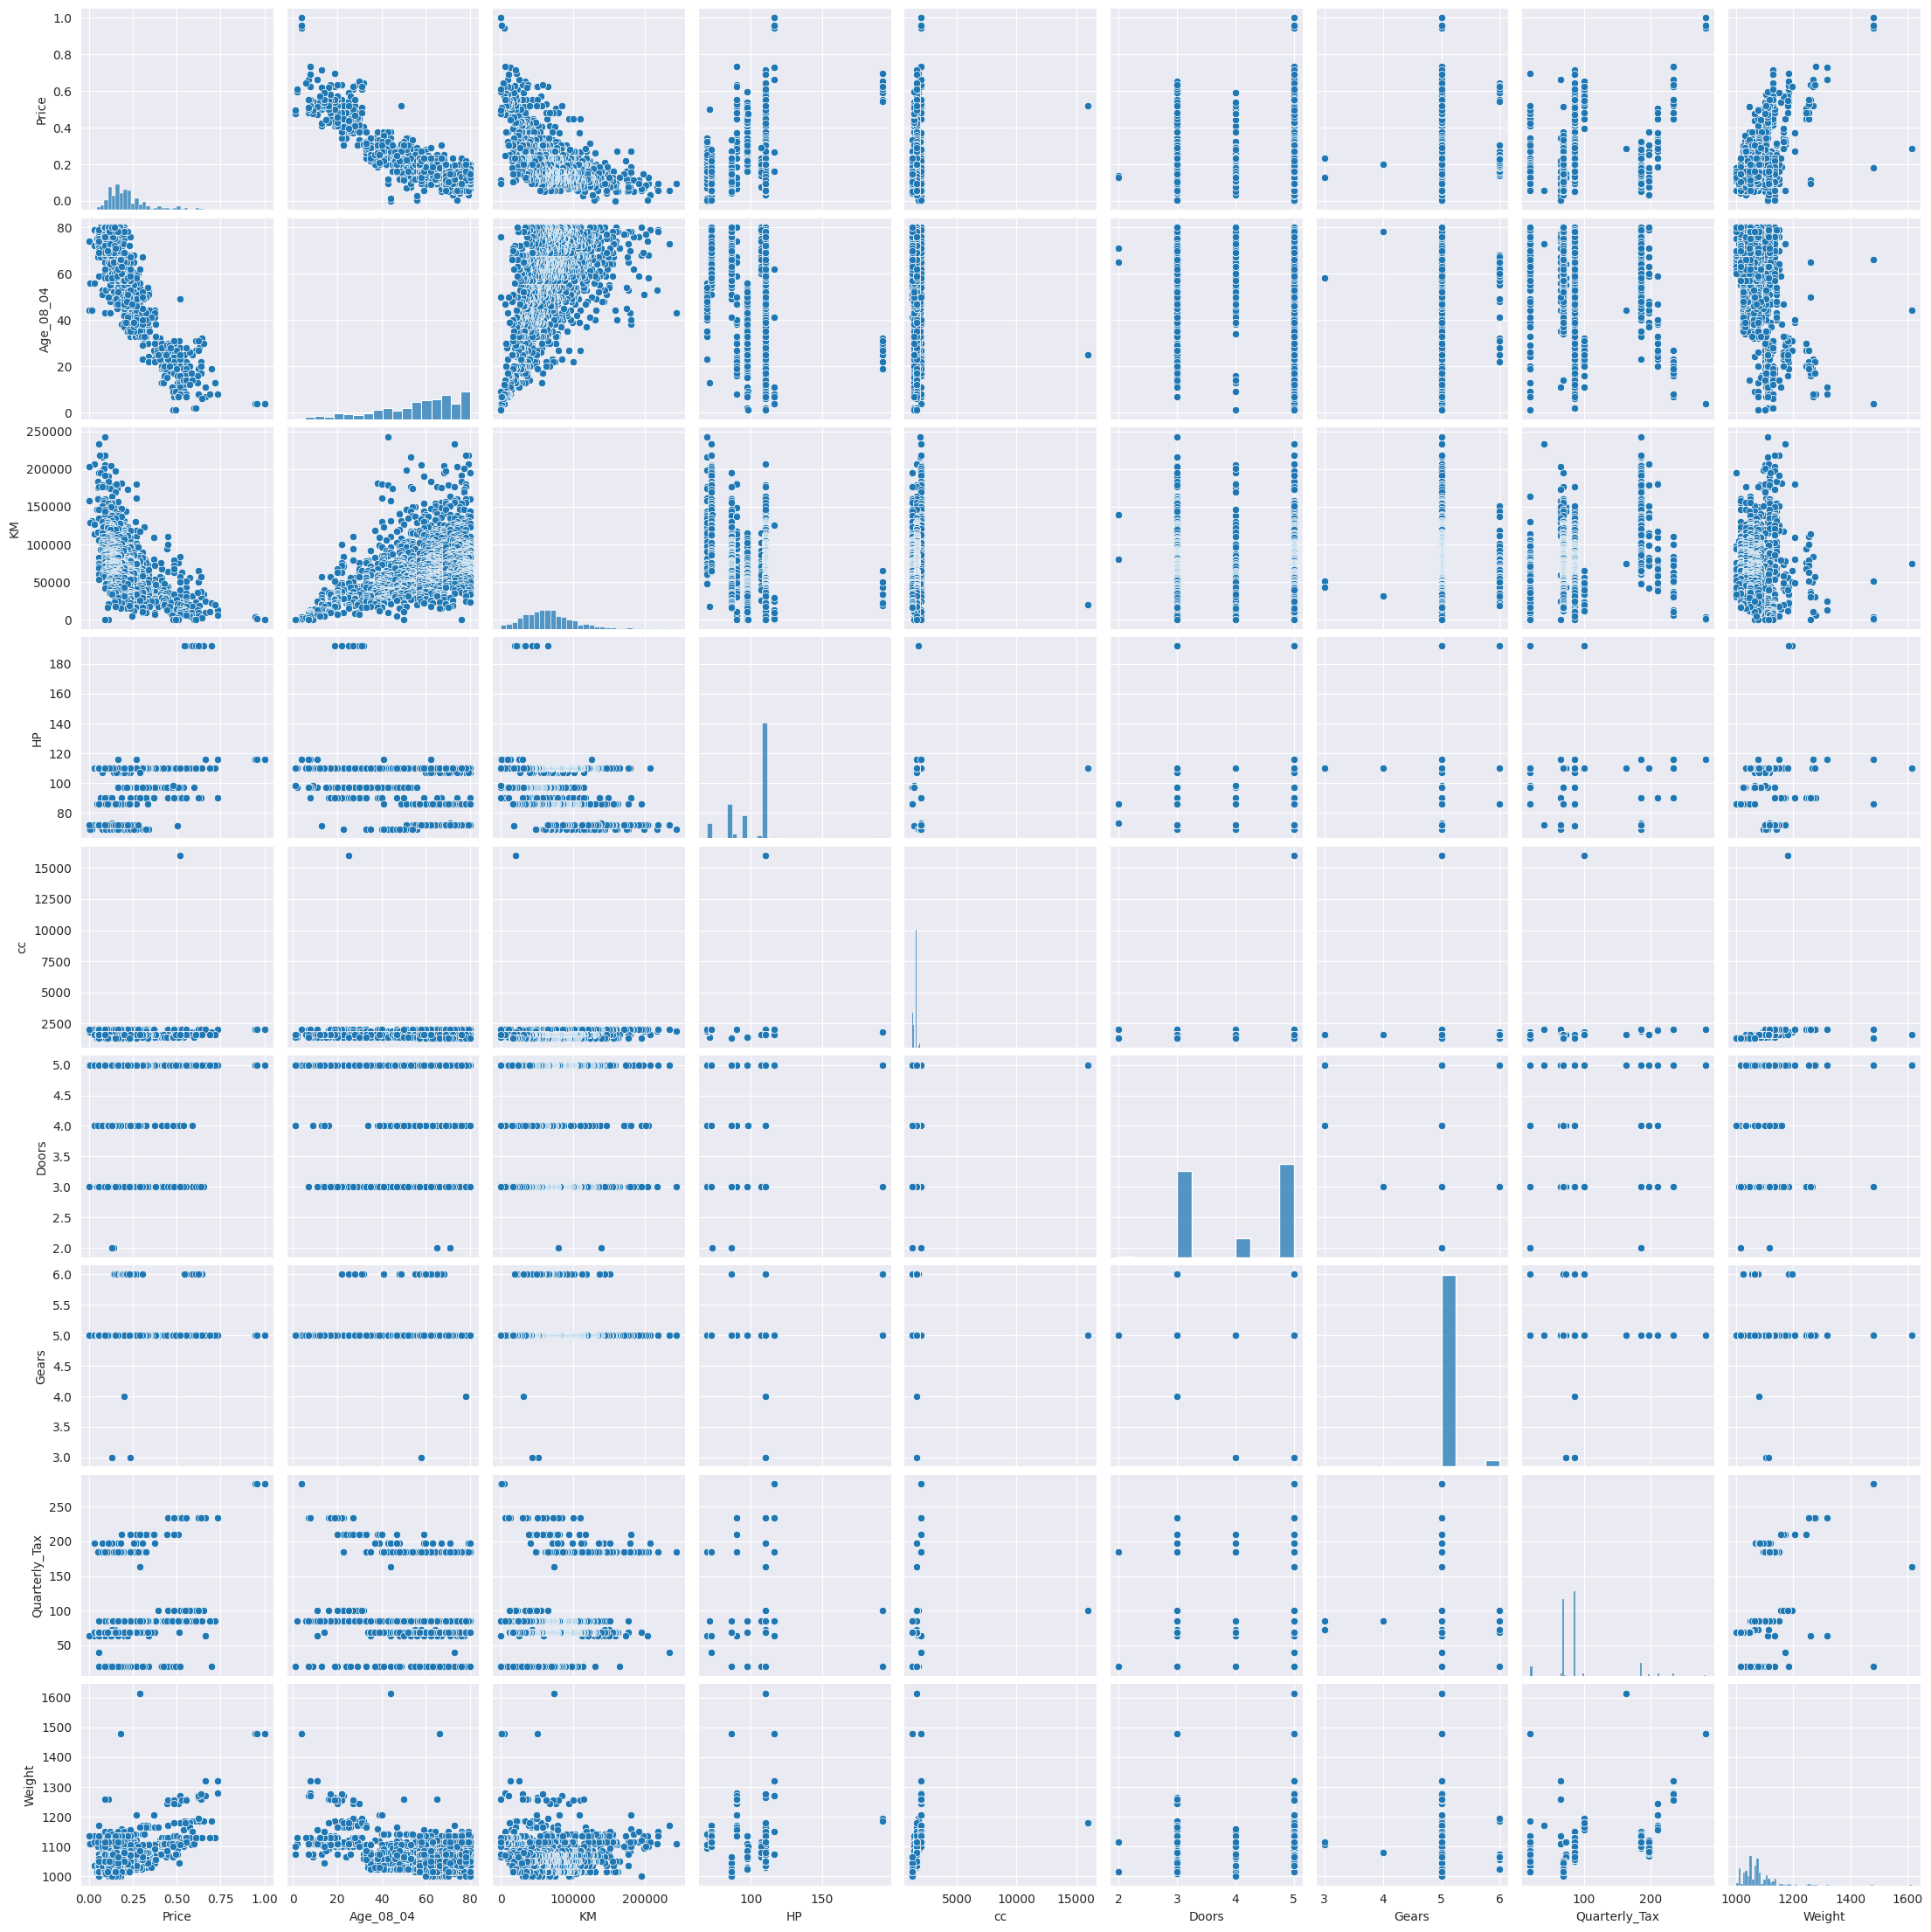

In [9]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df1)

In [10]:
# Split the variables X and Y
Y = df1["Price"]
#X =df1[['Age_08_04']]
#X =df1[['Age_08_04','Weight']]
#X =df1[['Age_08_04','Weight','KM']]
X =df1[['Age_08_04','Weight','KM','HP']]                     ### Best model fit
#X =df1[['Age_08_04','Weight','KM','HP','Quarterly_Tax']]
#X =df1[['Age_08_04','Weight','KM','HP','Quarterly_Tax','Doors']]
Y
X

,Age_08_04,Weight,KM,HP
0,23,1165,46986,90
1,23,1165,72937,90
2,24,1165,41711,90
3,26,1165,48000,90
4,30,1170,38500,90
...,...,...,...,...
1431,69,1025,20544,86
1432,72,1015,19000,86
1433,71,1015,17016,86
1434,70,1015,16916,86


In [11]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)

LinearRegression()

In [12]:
LR.coef_
LR.intercept_

-0.2971453560373412

In [13]:
Y_pred=LR.predict(X)
Y_pred

array([0.43357531, 0.41546277, 0.432908  , ..., 0.14269887, 0.14711767,
       0.22376169])

In [14]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("Mean Squared Error:",mse.round(4))

print("Root Mean Squared Error:",np.sqrt(mse).round(4))

Mean Squared Error: 0.0023
Root Mean Squared Error: 0.0479


In [15]:
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("r2_score:",r2.round(4))

r2_score: 0.8618


Improving the model by Data cleaning

In [16]:
import statsmodels.api as sm

model = sm.OLS(Y, X)  # Capitalize OLS
model = model.fit()

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X1 = df1[['Age_08_04','Weight','KM',"HP"]]
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif
# Weight and HP having high collinearity

[12.548132761494884, 60.24735439606885, 6.777581215047837, 51.499419197937655]

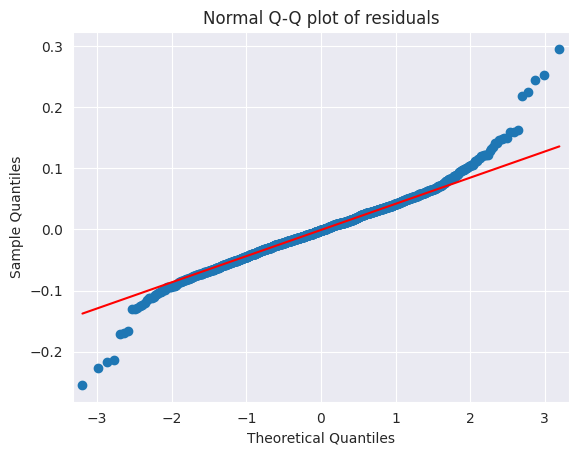

[array([], dtype=int64)]

In [18]:
# residual analysis by using Q-Q plot

import matplotlib.pyplot as plt

QQ_plot = sm.qqplot(model.resid,line="q") # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

list(np.where(model.resid>10))

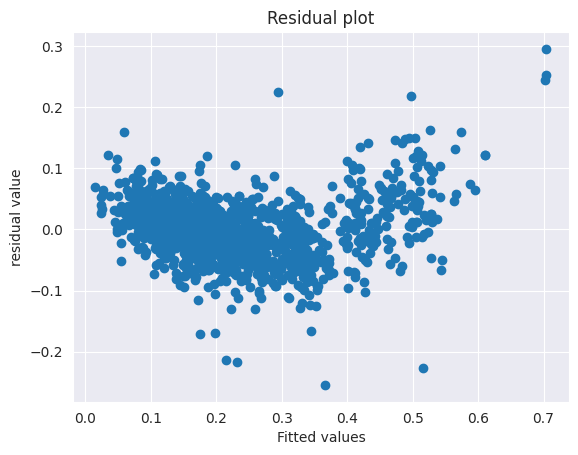

In [19]:
# Residual plot for homoscedasticity

model.fittedvalues
model.resid

plt.scatter(model.fittedvalues,model.resid)
plt.title("Residual plot")
plt.xlabel("Fitted values")
plt.ylabel("residual value")
plt.show()

In [20]:
# Model Deletion Diagnostics
# Detecting Influencers/Outliers
# Cook’s Distance

model_influence = model.get_influence()
(cooks , P_value) = model_influence.cooks_distance
(cooks , P_value)

(array([4.74474499e-03, 2.89775129e-03, 3.23380125e-03, ...,
        7.93021102e-07, 1.47969985e-03, 8.34004745e-03]),
 array([0.9999552 , 0.99998325, 0.99997915, ..., 1.        , 0.99999562,
        0.99986224]))

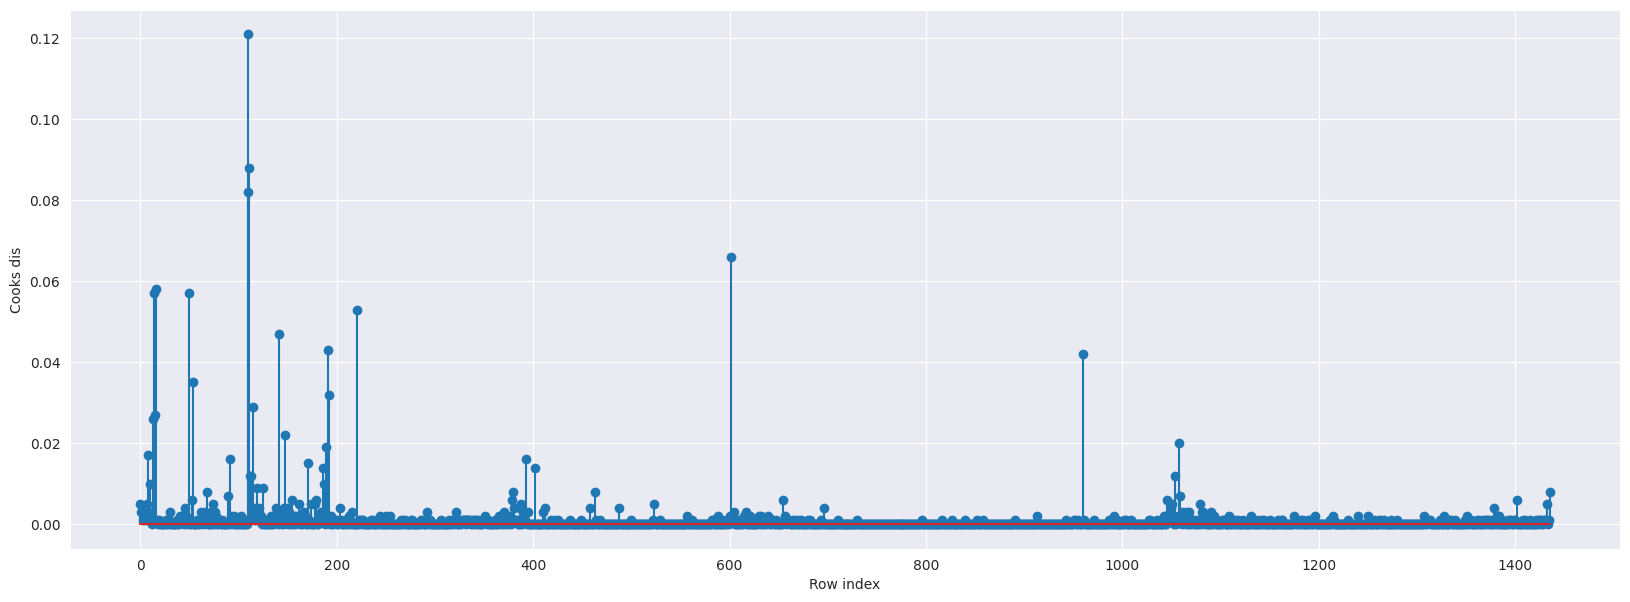

In [21]:
# Plot the influence values using the stemplot

fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(cooks,3))
plt.xlabel("Row index")
plt.ylabel("Cooks dis")
plt.show()

In [22]:
#index and value of influencer where c is more than 0.5
(np.argmax(cooks),np.max(cooks))

(109, 0.12112396869721878)

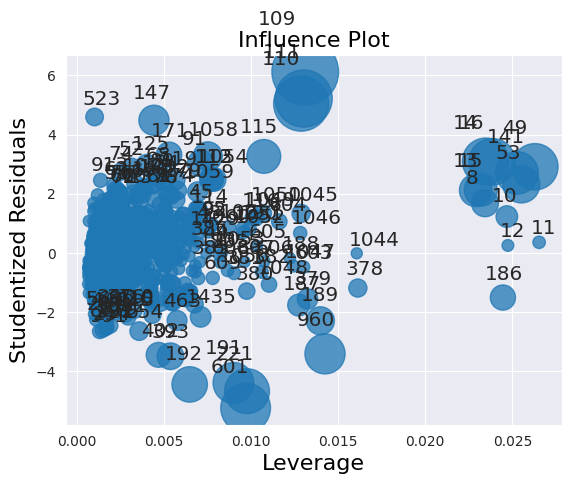

In [23]:
# High Influence points

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [24]:
from statsmodels.stats.outliers_influence import OLSInfluence
influence = model.get_influence()
threshold = 2.0
influence_summary = influence.summary_frame()
high_influence_points = influence_summary[influence_summary['hat_diag'] > threshold]
high_influence_indices = high_influence_points.index
high_influence_indices          ##There are no high influence INDICES

Int64Index([], dtype='int64')

In [25]:
# Removing influencer points
df1[df1.index.isin([109])]


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
109,1.0,4,1,116,2000,5,5,283,1480


In [26]:
df1_new = df1
df1_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.325044,23,46986,90,2000,3,5,210,1165
1,0.333925,23,72937,90,2000,3,5,210,1165
2,0.341030,24,41711,90,2000,3,5,210,1165
3,0.376554,26,48000,90,2000,3,5,210,1165
4,0.333925,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,0.111901,69,20544,86,1300,3,5,69,1025
1432,0.230728,72,19000,86,1300,3,5,69,1015
1433,0.147425,71,17016,86,1300,3,5,69,1015
1434,0.103020,70,16916,86,1300,3,5,69,1015


In [27]:
df1_new =df1_new.drop(["HP"],axis=1)    #Drop HP Having high collinearity
df1_new

,Price,Age_08_04,KM,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.325044,23,46986,2000,3,5,210,1165
1,0.333925,23,72937,2000,3,5,210,1165
2,0.341030,24,41711,2000,3,5,210,1165
3,0.376554,26,48000,2000,3,5,210,1165
4,0.333925,30,38500,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,0.111901,69,20544,1300,3,5,69,1025
1432,0.230728,72,19000,1300,3,5,69,1015
1433,0.147425,71,17016,1300,3,5,69,1015
1434,0.103020,70,16916,1300,3,5,69,1015


In [28]:
df1_new = df1_new.drop(df1_new.index[[109]],axis=0).reset_index()
df1_new                   # High influence points

,index,Price,Age_08_04,KM,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,0.325044,23,46986,2000,3,5,210,1165
1,1,0.333925,23,72937,2000,3,5,210,1165
2,2,0.341030,24,41711,2000,3,5,210,1165
3,3,0.376554,26,48000,2000,3,5,210,1165
4,4,0.333925,30,38500,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,1431,0.111901,69,20544,1300,3,5,69,1025
1431,1432,0.230728,72,19000,1300,3,5,69,1015
1432,1433,0.147425,71,17016,1300,3,5,69,1015
1433,1434,0.103020,70,16916,1300,3,5,69,1015


In [29]:
df1_new =df1_new.drop(["index"],axis=1)    #Drop newly created index column
df1_new

,Price,Age_08_04,KM,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.325044,23,46986,2000,3,5,210,1165
1,0.333925,23,72937,2000,3,5,210,1165
2,0.341030,24,41711,2000,3,5,210,1165
3,0.376554,26,48000,2000,3,5,210,1165
4,0.333925,30,38500,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1430,0.111901,69,20544,1300,3,5,69,1025
1431,0.230728,72,19000,1300,3,5,69,1015
1432,0.147425,71,17016,1300,3,5,69,1015
1433,0.103020,70,16916,1300,3,5,69,1015


Predict new model

In [30]:
# Split the variables x and y
y = df1_new["Price"]
#x =df1_new[['Age_08_04']]
#x =df1_new[['Age_08_04','Weight']]
x =df1_new[['Age_08_04','Weight','KM']]         ### Best model fit
y
x

,Age_08_04,Weight,KM
0,23,1165,46986
1,23,1165,72937
2,24,1165,41711
3,26,1165,48000
4,30,1170,38500
...,...,...,...
1430,69,1025,20544
1431,72,1015,19000
1432,71,1015,17016
1433,70,1015,16916


In [31]:
# Model fitting

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [32]:
# Model predicted values
y_pred = LR.predict(x)
y_pred

array([0.44820111, 0.42623698, 0.44836983, ..., 0.16701673, 0.17139725,
       0.22616782])

In [33]:
# Model evaluation

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
print("Mean square error ",mse.round(3))

import numpy as np
print("Root mean square error ", np.sqrt(mse).round(3))

Mean square error  0.002
Root mean square error  0.05


In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print("r2_score",r2.round(3))

r2_score 0.846


In [ ]:
## R2 values with cases with model improvement

# Case-1      r2_score 0.772
# Case-2      r2_score 0.804
# Case-3      r2_score 0.846